In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/AJVelezRueda/Fundamentos_de_informatica/master/Ciencia_de_datos/practicos/recursos/practico4.csv")
datos

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
1000,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
1001,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
1002,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
1003,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       1005 non-null   object 
 1   Dirección IP                1005 non-null   object 
 2   Actividad (en hs)           1005 non-null   float64
 3   Acceso a Facebook (en hs)   1000 non-null   float64
 4   Acceso a Instagram (en hs)  990 non-null    float64
 5   Acceso a Twitch (en hs)     999 non-null    float64
 6   Acceso a TikTok (en hs)     950 non-null    float64
dtypes: float64(5), object(2)
memory usage: 55.1+ KB


<AxesSubplot:>

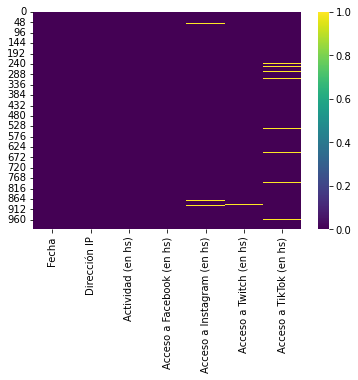

In [4]:
sns.heatmap(datos.isnull(), cmap = "viridis")

In [5]:
datos.isnull().sum()

Fecha                          0
Dirección IP                   0
Actividad (en hs)              0
Acceso a Facebook (en hs)      5
Acceso a Instagram (en hs)    15
Acceso a Twitch (en hs)        6
Acceso a TikTok (en hs)       55
dtype: int64

In [8]:
datos.columns

Index(['Fecha', 'Dirección IP', 'Actividad (en hs)',
       'Acceso a Facebook (en hs)', 'Acceso a Instagram (en hs)',
       'Acceso a Twitch (en hs)', 'Acceso a TikTok (en hs)'],
      dtype='object')

In [6]:
datos.describe()

,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
count,1005.000000,1000.000000,990.000000,999.000000,950.000000
mean,9.579622,3.707200,5.946747,5.158248,4.189189
std,5.721012,2.898833,3.962645,3.840922,2.815012
min,-2.060000,0.570000,0.450000,0.010000,0.060000
25%,4.810000,2.027500,2.100000,2.010000,2.162500
50%,8.030000,2.860000,6.385000,3.660000,3.605000
75%,14.000000,5.032500,9.377500,8.085000,5.147500
max,34.450000,37.060000,22.960000,23.680000,19.230000


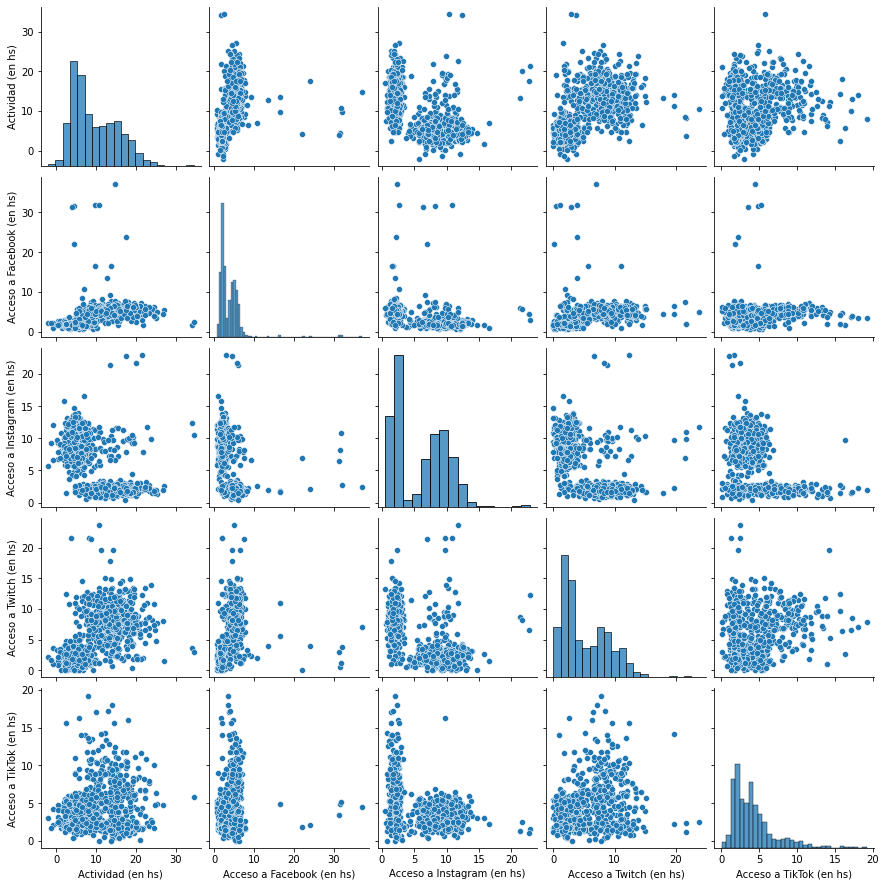

In [9]:
sns.pairplot(datos)

<AxesSubplot:xlabel='Acceso a Instagram (en hs)', ylabel='Count'>

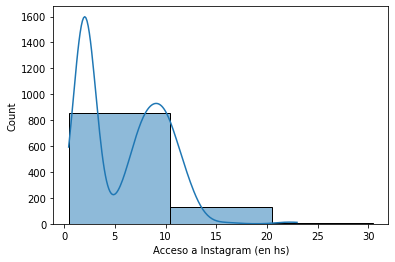

In [13]:
sns.histplot(data = datos, x = "Acceso a Instagram (en hs)", binwidth=10, kde = True)

<AxesSubplot:xlabel='Actividad (en hs)', ylabel='Count'>

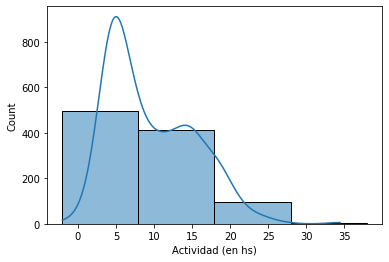

In [14]:
sns.histplot(data = datos, x = "Actividad (en hs)", binwidth=10, kde = True)